# This is the worst code I've ever written
## It should use list comprehension, if I do another draft of it

In [1]:
import glob
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
SM_SIZE = 10
MD_SIZE = 12
LG_SIZE = 16

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

### Run RADEX for the same situation (100 K) (but this time change redshifts)

In [3]:
import pyradex
import os
os.environ['RADEX_DATAPATH'] = '/orange/adamginsburg/repos/pyradex/lamda/'
import matplotlib.pyplot as plt
from astroquery.lamda import Lamda
# import dask
# dask.config.set(scheduler = 'threads', num_workers = 8)
# from dask.diagnostics import ProgressBar
# ProgressBar().register()

In [4]:
ls /orange/adamginsburg/repos/pyradex/lamda/

ch3oh_a.dat  co.dat  e-ch3oh.dat  nacl.dat  ph2co-h2.dat  sio-h2.dat


In [5]:
# Make different redshifts array
tbackground = 2.7315
redshifts = np.array([0, 0.5, 1, 2, 3, 4, 5])
tbackground_zs = tbackground*(1+redshifts)
tbackground_zs

array([ 2.7315 ,  4.09725,  5.463  ,  8.1945 , 10.926  , 13.6575 ,
       16.389  ])

In [6]:
# Get methanol A species results for given column, density, and temperature
set_column = 1e14
set_density = 1e5
set_temp = 50
# rrs = [pyradex.Radex(species='ch3oh_a', column=set_column, density={'H2':set_density}, temperature=set_temp, tbackground=tb) for tb in tbackground_zs]
# tbls = [rr() for rr in rrs]

In [7]:
# # Which line is the dasar line?
# np.argmax((tbls[0]['upperlevel'] == b'3_1   ') & (tbls[0]['lowerlevel'] == b'4_0   '))

In [8]:
# tbls[0][62]

In [9]:
# ### BAD LIST COMPREHENSION
# radex_dens = np.geomspace(1000.0, 10000000.0, 6) # Used to be 20 for both but ran long
# radex_coldens = np.geomspace(1e13, 1e+16, 6)
# rsltss = [[[[rr(density = {'H2':dens}, column = coldens, temperature = 100)[62]['Tex', 'tau', 'T_B'] for dens in radex_dens] for coldens in radex_coldens] for rr in rrs]

In [10]:
### BAD LIST COMPREHENSION
# # radex_tex = [[l['Tex'] for l in r] for r in rslts] # I tried this and it was wrong: [l['Tex'] for r in rslts for l in r]
# # radex_tau = [[l['tau'] for l in r] for r in rslts]
# radex_T_Bs = np.array([[[l['T_B'] for l in r] for r in rslts] for rslts in rsltss])

In [11]:
### BAD LIST COMPREHENSION PLOT
# import matplotlib.colors as colors
# from itertools import cycle

# radex_dens, radex_dens_ids = np.unique(radex_dens, return_inverse=True) # This line doesn't work because I need to know which 
#                                                                         # Tex map to which dens and coldens
# radex_coldens, radex_coldens_ids = np.unique(radex_coldens, return_inverse=True)
# radex_dens_grid, radex_coldens_grid = np.meshgrid(radex_dens, radex_coldens)

# fig, ax = plt.subplots(1, 1, figsize = (10, 5))

# # Want to show -0.1 K at different redshifts
# rep_contour = -0.1

# # Make cyclers
# color_list = ['k','r','m','y','g','b']
# linestyle_list = ["-","--","-.",":"]
# colorcycler = cycle(color_list)
# linecycler = cycle(linestyle_list)

# # cs_s = [[ax.contour(radex_dens_grid, radex_coldens_grid, radex_T_B, 
# #                     colors = [next(colorcycler)], linestyles = [next(linecycler)],
# #                     levels = [rep_contour], alpha = 1)] for radex_T_B in radex_T_Bs]

# # Testing just one:
# cs_0 = ax.contour(radex_dens_grid, radex_coldens_grid, radex_T_Bs[0], 
#                   levels = [rep_contour], alpha = 1, colors = [next(colorcycler)], linestyles = [next(linecycler)])

# artists_0, labels_0 = cs_0.legend_elements()
# artists_1, labels_1 = cs_1.legend_elements()
# artists_2, labels_2 = cs_2.legend_elements()
# artists_3, labels_3 = cs_3.legend_elements()
# artists_4, labels_4 = cs_4.legend_elements()
# artists_5, labels_5 = cs_5.legend_elements()
# ax.legend(handles = [artists_0[0], artists_1[0], artists_2[0], artists_3[0], artists_4[0], artists_5[0]], 
#           labels = [f'$z = 0$', f'$z = 1$', f'$z = 2$', f'$z = 3$', f'$z = 4$', f'$z = 5$'], loc="upper right")

# ax.set_ylabel("Column density, $N_{H_2}$ [cm$^{-2}$]")
# ax.set_xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
# ax.set_xscale('log')
# ax.set_yscale('log')

# # plt.savefig('632e0742965a6e88270d73d7/figures/pyradex_results_redshift.pdf', bbox_inches = 'tight')
# # plt.savefig('632e0742965a6e88270d73d7/figures/pyradex_results_redshift.png', dpi = 200, bbox_inches = 'tight')

# plt.show()

In [14]:
# Something went wrong. Let's try to do this without listcomp for 2 (now all) redshifts
# I regret not having done this using loops, because I am now adding in z = 0.5 (it's not that bad though)

import time
t_start = time.time()

t0 = tbackground_zs[0]
t0p5 = tbackground_zs[1]
t1 = tbackground_zs[2]
t2 = tbackground_zs[3]
t3 = tbackground_zs[4]
t4 = tbackground_zs[5]
t5 = tbackground_zs[6]

radex_dens = np.geomspace(100.0, 100000000.0, 30) # Was using 20 by 20 but it wasn't fine enough; this will take a long time to run
radex_coldens = np.geomspace(1e12, 1e+16, 50)

In [15]:
rr0 = pyradex.Radex(species='ch3oh_a', column=set_column, density={'H2':set_density}, temperature=set_temp, tbackground=t0)
rslts0 = [[rr0(density = {'H2':dens}, column = coldens, temperature = 100)[62]['Tex', 'tau', 'T_B'] for dens in radex_dens] for coldens in radex_coldens]
print("Done with redshift 0")
rr0p5 = pyradex.Radex(species='ch3oh_a', column=set_column, density={'H2':set_density}, temperature=set_temp, tbackground=t0p5)
rslts0p5 = [[rr0p5(density = {'H2':dens}, column = coldens, temperature = 100)[62]['Tex', 'tau', 'T_B'] for dens in radex_dens] for coldens in radex_coldens]
print("Done with redshift 0.5")
rr1 = pyradex.Radex(species='ch3oh_a', column=set_column, density={'H2':set_density}, temperature=set_temp, tbackground=t1)
rslts1 = [[rr1(density = {'H2':dens}, column = coldens, temperature = 100)[62]['Tex', 'tau', 'T_B'] for dens in radex_dens] for coldens in radex_coldens]
print("Done with redshift 1")
rr2 = pyradex.Radex(species='ch3oh_a', column=set_column, density={'H2':set_density}, temperature=set_temp, tbackground=t2)
rslts2 = [[rr2(density = {'H2':dens}, column = coldens, temperature = 100)[62]['Tex', 'tau', 'T_B'] for dens in radex_dens] for coldens in radex_coldens]
print("Done with redshift 2")
rr3 = pyradex.Radex(species='ch3oh_a', column=set_column, density={'H2':set_density}, temperature=set_temp, tbackground=t3)
rslts3 = [[rr3(density = {'H2':dens}, column = coldens, temperature = 100)[62]['Tex', 'tau', 'T_B'] for dens in radex_dens] for coldens in radex_coldens]
print("Done with redshift 3")
rr4 = pyradex.Radex(species='ch3oh_a', column=set_column, density={'H2':set_density}, temperature=set_temp, tbackground=t4)
rslts4 = [[rr4(density = {'H2':dens}, column = coldens, temperature = 100)[62]['Tex', 'tau', 'T_B'] for dens in radex_dens] for coldens in radex_coldens]
print("Done with redshift 4")
rr5 = pyradex.Radex(species='ch3oh_a', column=set_column, density={'H2':set_density}, temperature=set_temp, tbackground=t5)
rslts5 = [[rr5(density = {'H2':dens}, column = coldens, temperature = 100)[62]['Tex', 'tau', 'T_B'] for dens in radex_dens] for coldens in radex_coldens]
print("Done with redshift 5")

radex_T_B0 = [[l['T_B'] for l in r] for r in rslts0]
radex_T_B0p5 = [[l['T_B'] for l in r] for r in rslts0p5]
radex_T_B1 = [[l['T_B'] for l in r] for r in rslts1]
radex_T_B2 = [[l['T_B'] for l in r] for r in rslts2]
radex_T_B3 = [[l['T_B'] for l in r] for r in rslts3]
radex_T_B4 = [[l['T_B'] for l in r] for r in rslts4]
radex_T_B5 = [[l['T_B'] for l in r] for r in rslts5]

Done with redshift 0
Done with redshift 0.5
Done with redshift 1
Done with redshift 2
Done with redshift 3


/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/pyradex-0.4.2.dev0-py3.9.egg/pyradex/core.py:1056: RuntimeWarning: overflow encountered in exp
  bnutex = thc*xt/(np.exp(earg)-1.0)


Done with redshift 4
Done with redshift 5


In [16]:
radex_dens, radex_dens_ids = np.unique(radex_dens, return_inverse=True) # This line doesn't work because I need to know which 
                                                                        # Tex map to which dens and coldens
radex_coldens, radex_coldens_ids = np.unique(radex_coldens, return_inverse=True)
radex_dens_grid, radex_coldens_grid = np.meshgrid(radex_dens, radex_coldens)

In [17]:
# np.min(radex_results[6])

In [18]:
# Figure out what (density, column density) coordinate the maximum absorption depth is at for any given redshift
# Idea: use argmin unpacked (I have definitely done something like this before)
# But so has StackOverflow: https://stackoverflow.com/questions/51868834/multi-dimensional-np-argmax

radex_results = np.array([radex_T_B0, radex_T_B0p5, radex_T_B1, radex_T_B2, radex_T_B3, radex_T_B4, radex_T_B5])

densities = []
coldenses = []
T_B_min = []
for zz in radex_results:
    T_B_min.append(np.min(zz))
    zz2D = zz.reshape(zz.shape[0]*zz.shape[1])
    row, col = np.unravel_index(np.argmin(zz2D), zz.shape)
    densities.append(radex_dens_grid[row, col])
    coldenses.append(radex_coldens_grid[row, col])
    
densities = np.array(densities)
coldenses = np.array(coldenses)
T_B_min = np.array(T_B_min)

In [19]:
for i in range(len(densities)):
    print(f"{densities[i]}, {coldenses[i]:0.1e}")
# The last 2 are at the same coordinates

161.02620275609394, 1.0e+16
4520.35365636024, 1.5e+15
11721.022975334794, 1.3e+15
30391.95382313195, 1.5e+15
48939.00918477499, 2.2e+15
48939.00918477499, 3.2e+15
78804.62815669904, 3.9e+15


/scratch/local/3667428/ipykernel_16712/3356079605.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('hot') # Was using copper but it was kinda blah
/scratch/local/3667428/ipykernel_16712/3356079605.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  min0 = ax.scatter(densities[0], coldenses[0], marker = "o", c=color_list[0], s=temp_marker_size, zorder = 100)
/scratch/local/3667428/ipykernel_16712/3356079605.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should 

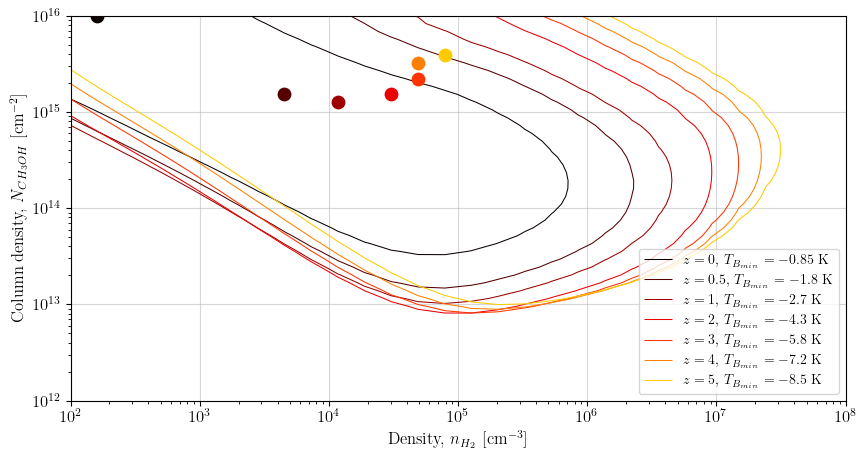

In [20]:
from itertools import cycle
import matplotlib

fig, ax = plt.subplots(1, 1, figsize = (10, 5))

# Want to show -0.1 K at different redshifts
rep_contour = -0.1
deep_contours = (-tbackground_zs + 1)

# Make cyclers
cmap = matplotlib.cm.get_cmap('hot') # Was using copper but it was kinda blah
color_list = cmap(np.linspace(0, 1, 10)) # Should say 7 but I don't want it to go all the way to the end of the colormap
# print(color_list)
# color_list = ['k','r','m','y','g','b']
# linestyle_list = ["-","--","-.",":"]
# colorcycler = cycle(color_list)
# linecycler = cycle(linestyle_list)

cs_0 = ax.contour(radex_dens_grid, radex_coldens_grid, radex_T_B0, 
                  levels = [rep_contour], alpha = 1, colors = [color_list[0]], linestyles = ['-'], linewidths = [0.75, 1])
cs_0p5 = ax.contour(radex_dens_grid, radex_coldens_grid, radex_T_B0p5, 
                    levels = [rep_contour], alpha = 1, colors = [color_list[1]], linestyles = ['-'], linewidths = [0.75, 1])
cs_1 = ax.contour(radex_dens_grid, radex_coldens_grid, radex_T_B1, 
                  levels = [rep_contour], alpha = 1, colors = [color_list[2]], linestyles = ['-'], linewidths = [0.75, 1])
cs_2 = ax.contour(radex_dens_grid, radex_coldens_grid, radex_T_B2, 
                  levels = [rep_contour], alpha = 1, colors = [color_list[3]], linestyles = ['-'], linewidths = [0.75, 1])
cs_3 = ax.contour(radex_dens_grid, radex_coldens_grid, radex_T_B3, 
                  levels = [rep_contour], alpha = 1, colors = [color_list[4]], linestyles = ['-'], linewidths = [0.75, 1])
cs_4 = ax.contour(radex_dens_grid, radex_coldens_grid, radex_T_B4, 
                  levels = [rep_contour], alpha = 1, colors = [color_list[5]], linestyles = ['-'], linewidths = [0.75, 1])
cs_5 = ax.contour(radex_dens_grid, radex_coldens_grid, radex_T_B5, 
                  levels = [rep_contour], alpha = 1, colors = [color_list[6]], linestyles = ['-'], linewidths = [0.75, 1])

# Put an X at the minimum value at each redshift
temp_marker_size = 80
min0 = ax.scatter(densities[0], coldenses[0], marker = "o", c=color_list[0], s=temp_marker_size, zorder = 100)
min0p5 = ax.scatter(densities[1], coldenses[1], marker = "o", c=color_list[1], s=temp_marker_size, zorder = 100)
min1 = ax.scatter(densities[2], coldenses[2], marker = "o", c=color_list[2], s=temp_marker_size, zorder = 100)
min2 = ax.scatter(densities[3], coldenses[3], marker = "o", c=color_list[3], s=temp_marker_size, zorder = 100)
min3 = ax.scatter(densities[4], coldenses[4], marker = "o", c=color_list[4], s=temp_marker_size, zorder = 100)
min4 = ax.scatter(densities[5], coldenses[5], marker = "o", c=color_list[5], s=temp_marker_size, zorder = 100)
min5 = ax.scatter(densities[6], coldenses[6], marker = "o", c=color_list[6], s=temp_marker_size, zorder = 100)

# Make a legend by hand
artists_0, labels_0 = cs_0.legend_elements()
artists_0p5, labels_0p5 = cs_0p5.legend_elements()
artists_1, labels_1 = cs_1.legend_elements()
artists_2, labels_2 = cs_2.legend_elements()
artists_3, labels_3 = cs_3.legend_elements()
artists_4, labels_4 = cs_4.legend_elements()
artists_5, labels_5 = cs_5.legend_elements()
ax.legend(handles = [artists_0[0], artists_0p5[0], artists_1[0], artists_2[0], artists_3[0], artists_4[0], artists_5[0]], 
          labels = [f'$z = 0$, $T_{{B_{{min}}}} = {np.min(radex_results[0]):.2g}$ K', 
                    f'$z = 0.5$, $T_{{B_{{min}}}} = {np.min(radex_results[1]):.2g}$ K', 
                    f'$z = 1$, $T_{{B_{{min}}}} = {np.min(radex_results[2]):.2g}$ K', 
                    f'$z = 2$, $T_{{B_{{min}}}} = {np.min(radex_results[3]):.2g}$ K', 
                    f'$z = 3$, $T_{{B_{{min}}}} = {np.min(radex_results[4]):.2g}$ K', 
                    f'$z = 4$, $T_{{B_{{min}}}} = {np.min(radex_results[5]):.2g}$ K', 
                    f'$z = 5$, $T_{{B_{{min}}}} = {np.min(radex_results[6]):.2g}$ K'], loc="lower right")

ax.set_ylabel("Column density, $N_{CH_3 OH}$ [cm$^{-2}$]")
ax.set_xlabel("Density, $n_{H_2}$ [cm$^{-3}$]")
ax.set_xscale('log')
ax.set_yscale('log')

plt.grid(alpha = 0.5)

# Make sure plot backgrounds are right for poster
ax.set(facecolor = "white")
fig.patch.set_alpha(0.0)

plt.savefig('632e0742965a6e88270d73d7/pyradex_results_redshift.pdf', bbox_inches = 'tight')
# plt.savefig('632e0742965a6e88270d73d7/figures/pyradex_results_redshift.png', dpi = 200, bbox_inches = 'tight')

plt.show()

In [21]:
t_end = time.time()
total = t_end - t_start
print(total,"seconds")

11535.33449625969 seconds


In [22]:
# Redo Matplotlib parameters for this plot

SM_SIZE = 12
MD_SIZE = 14
LG_SIZE = 16

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = SM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = SM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

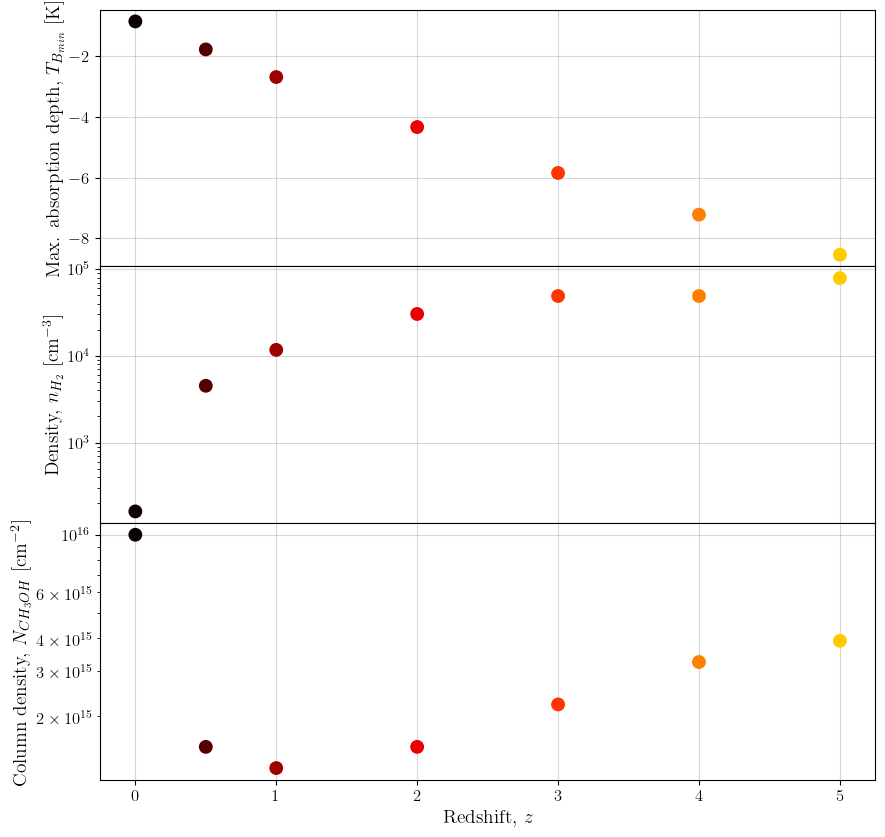

In [23]:
fig = plt.figure(dpi = 100, figsize = (10, 10))

gs = fig.add_gridspec(3, hspace=0)

axs = gs.subplots(sharex=True, sharey=False)

axs[0].grid(alpha = 0.5)
axs[1].grid(alpha = 0.5)
axs[2].grid(alpha = 0.5)

axs[0].scatter(redshifts, T_B_min, s=temp_marker_size, c = color_list[0:7], zorder = 1000)
axs[1].scatter(redshifts, densities, s=temp_marker_size, c = color_list[0:7], zorder = 1000)
axs[2].scatter(redshifts, coldenses, s=temp_marker_size, c = color_list[0:7], zorder = 1000)

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

axs[2].set_xlabel("Redshift, $z$")
axs[0].set_ylabel("Max. absorption depth, $T_{B_{min}}$ [K]")
axs[1].set_ylabel("Density, $n_{H_2}$ [cm$^{-3}$]")
axs[2].set_ylabel("Column density, $N_{CH_3 OH}$ [cm$^{-2}$]")

axs[1].set_yscale('log')
axs[2].set_yscale('log')

plt.savefig('632e0742965a6e88270d73d7/pyradex_results_redshift_params.pdf', bbox_inches = 'tight')
# plt.savefig('632e0742965a6e88270d73d7/figures/pyradex_results_redshift_params.png', dpi = 200, bbox_inches = 'tight')

plt.show()